<a href="https://colab.research.google.com/github/riyaaaaaa/2015186_RiyaRastogi/blob/main/Handwritten_Recognition_RiyaRastogi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# This is multiclass classification problem
from keras.datasets import mnist
dataset = mnist.load_data('mnist.db')

In [26]:
train, test = dataset
X_train, y_train = train
X_test, y_test = test

In [27]:
len(X_train)


60000

In [28]:
len(X_test)

10000

In [29]:
# 1st image
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [30]:
# Check shape 
X_train[0].shape

(28, 28)

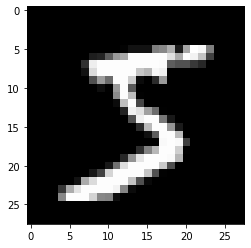

In [31]:
# Visualize
import matplotlib.pyplot as plt 
plt.imshow(X_train[0], cmap='gray')

In [32]:
print(y_train[0])  # Actual label for above image

5


In [33]:
# Convert 2D image to 1D 
X_train.shape
# 60000 records of 2D 28 X 28 shape

(60000, 28, 28)

In [34]:
# Reshaping training data
X_train_1d = X_train.reshape(60000, 28*28) 
X_train_1d.shape

(60000, 784)

In [35]:
# reshaping test data
X_test_1d = X_test.reshape(-1, 28*28) 
X_test_1d.shape

(10000, 784)

In [36]:
# convert target y to dummy variable 
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)

In [37]:
# 10 different classes 0 - 9. 
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [38]:
# Creating model 
from keras.models import Sequential
model = Sequential()
from keras.layers import Dense

In [39]:
model.add(
    Dense(
        units = 512, #
        input_dim=28*28,
        activation="relu"
    )
)
model.add(
    Dense(
        units=256, 
        activation="relu"
    )
)
model.add(
    Dense(
        units=128, 
        activation="relu"
    )
)
model.add(
    Dense(
        units=64, 
        activation="relu"
    )
)
model.add(
    Dense(
        units=32, 
        activation="relu"
    )
)
model.add(
    Dense(
        units=16, 
        activation="relu"
    )
)
model.add(
    Dense(
        units=10, 
        activation="softmax"
    )
)

In [40]:
# Compile Model 
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(X_train_1d, y_train_cat, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5001 - accuracy: 0.8799
Epoch 2/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1766 - accuracy: 0.9524
Epoch 3/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1373 - accuracy: 0.9623
Epoch 4/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1053 - accuracy: 0.9708
Epoch 5/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0888 - accuracy: 0.9759
Epoch 6/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0714 - accuracy: 0.9804
Epoch 7/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0630 - accuracy: 0.9832
Epoch 8/50
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0539 - accuracy: 0.9852
Epoch 9/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0474 - accuracy: 0.9868
Epoch 10/50
1875/1875 [==============================] - 13s 7ms/step - l

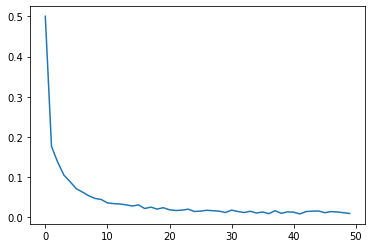

In [41]:
loss = model.history.history["loss"]
import matplotlib.pyplot as plt 
plt.plot(loss)

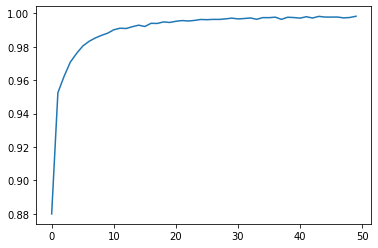

In [42]:
acc = model.history.history["accuracy"]
plt.plot(acc)

In [43]:
model.save("mnist-acc-0.9991.h5")

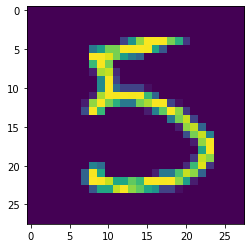

In [44]:
# Testing
imgTest = X_test[15]
plt.imshow(imgTest)

In [45]:
sample = imgTest.reshape(1, 28*28)
pred = model.predict(sample)

In [46]:
pred

array([[2.7353744e-21, 2.2884239e-27, 3.4916223e-37, 3.3429029e-13,
        2.8446236e-27, 1.0000000e+00, 7.4046227e-25, 3.4102750e-27,
        1.9060170e-15, 1.2355381e-21]], dtype=float32)

In [47]:
import numpy as np 
max_val = np.amax(pred)

In [48]:
result = np.where(pred == np.amax(pred))
max(result)

array([5])

In [49]:
model_predictions = model.predict(X_test_1d)
result = np.where(model_predictions == np.amax(model_predictions))
index = result[1]

In [50]:
index #Predictions

array([7, 2, 1, ..., 3, 4, 5])

In [51]:
y_test # actual answers

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)